In [1]:
import tensorflow
import numpy as np
import os
import tensorflow as tf
import PIL
import PIL.Image
# import tensorflow_datasets as tfds
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers

Using TensorFlow backend.


In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "imgs4/",
  validation_split=0.45,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3551 files belonging to 4 classes.
Using 1954 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "imgs4/",
  validation_split=0.45,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3551 files belonging to 4 classes.
Using 1597 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['ChinNoseMouth', 'Good', 'Nose', 'NoseMouth']

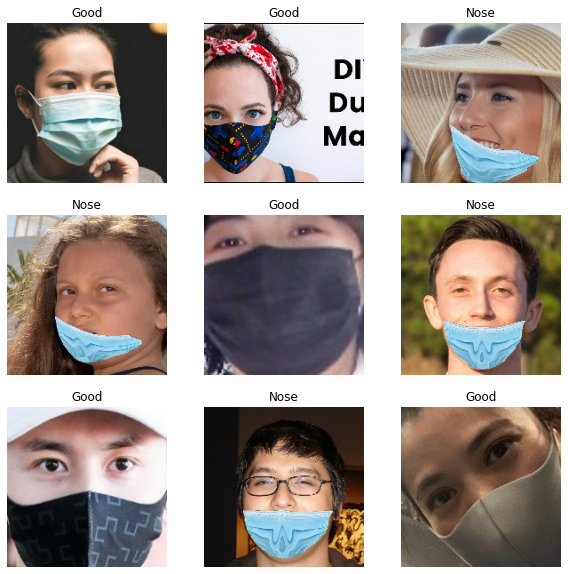

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = 4

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
62/62 [==============================] - 56s 857ms/step - loss: 0.6962 - accuracy: 0.7385 - val_loss: 0.1229 - val_accuracy: 0.9681

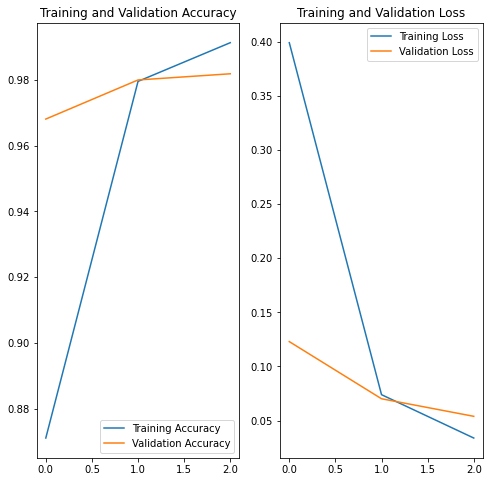

In [14]:
epochs = 3
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#logistic regression
#not complete

num_classes = 2 

num_features = 97200 # 28*28

# Training parameters.

learning_rate = 0.01

training_steps = 32

lr_batch_size = 32

display_step = 50

In [ ]:
W = tf.Variable(tf.ones((97200,2)), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")


In [2]:
# Logistic regression (Wx + b).

def logistic_regression(x):

    # Apply softmax to normalize the logits to a probability distribution.

    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.

def cross_entropy(y_pred, y_true):

    # Encode label to a one hot vector.

    y_true = tf.one_hot(y_true, depth=num_classes)

    # Clip prediction values to avoid log(0) error.

    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    # Compute cross-entropy.

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [3]:
# Accuracy metric.

def accuracy(y_pred, y_true):

# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.

optimizer = tf.optimizers.SGD(learning_rate)

NameError: name 'tf' is not defined

In [ ]:
# Optimization process. 

def run_optimization(x, y):

# Wrap computation inside a GradientTape for automatic differentiation.

    with tf.GradientTape() as g:

        pred = logistic_regression(x)

        loss = cross_entropy(pred, y)

    # Compute gradients.

    gradients = g.gradient(loss, [W, b])

  

    # Update W and b following gradients.

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# Run training for the given number of steps.

for step, (batch_x, batch_y) in enumerate(train_ds.take(training_steps), 1):

    # Run the optimization to update W and b values.
    #print(step)
    run_optimization(tf.reshape(batch_x, (32, 97200)), batch_y)

    

    if step % display_step == 0:

        pred = logistic_regression(batch_x)

        loss = cross_entropy(pred, batch_y)

        acc = accuracy(pred, batch_y)

        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

In [ ]:
# Test model on validation set.
for images,labels in val_ds.take(1):
    pred = logistic_regression(tf.reshape(images, (256, 97200)))

    print("Test Accuracy: %f" % accuracy(pred, labels))

In [ ]:
for images,labels in val_ds.take(1):
    print(images)